In [160]:
import os
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", 200)
#messages = pd.read_csv('news.csv')

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [2]:
res = pd.read_csv('result_2.csv')


In [3]:
tseries = res[['<TICKER>', 'y_2']].dropna()

In [4]:
ticker_list = list(res['<TICKER>'].unique())

In [5]:
#ADF statistic to check stationarity
for ticker in  ticker_list:
    print('--------------'+ticker+'---------------')
    x = tseries[tseries['<TICKER>'] == ticker]
    t = x['y_2'].values
    timeseries = adfuller(t)
    print('ADF Statistic: %f' % timeseries[0])
    print('p-value: %f' % timeseries[1])
    print('Critical Values:')
    for key, value in timeseries[4].items():
        print('\t%s: %.3f' % (key, value))
        if timeseries[0] > timeseries[4]["5%"]:
            print ("Failed to Reject Ho - Time Series is Non-Stationary")
        else:
            print ("Reject Ho - Time Series is Stationary")

--------------GOOG-RM---------------
ADF Statistic: -21.394987
p-value: 0.000000
Critical Values:
	1%: -3.437
Reject Ho - Time Series is Stationary
	5%: -2.865
Reject Ho - Time Series is Stationary
	10%: -2.568
Reject Ho - Time Series is Stationary
--------------FIVE---------------
ADF Statistic: -36.709840
p-value: 0.000000
Critical Values:
	1%: -3.435
Reject Ho - Time Series is Stationary
	5%: -2.864
Reject Ho - Time Series is Stationary
	10%: -2.568
Reject Ho - Time Series is Stationary
--------------SBER---------------
ADF Statistic: -76.140519
p-value: 0.000000
Critical Values:
	1%: -3.431
Reject Ho - Time Series is Stationary
	5%: -2.862
Reject Ho - Time Series is Stationary
	10%: -2.567
Reject Ho - Time Series is Stationary
--------------RBCM---------------
ADF Statistic: -18.089386
p-value: 0.000000
Critical Values:
	1%: -3.435
Reject Ho - Time Series is Stationary
	5%: -2.864
Reject Ho - Time Series is Stationary
	10%: -2.568
Reject Ho - Time Series is Stationary
-------------

## цену делаю

In [6]:
res = pd.read_csv('result_3.csv')

In [7]:
res_1 = pd.read_csv('result_1.csv')

In [8]:
res['date']= pd.to_datetime(res['date'])
res_1['date']= pd.to_datetime(res_1['date'])

In [9]:
ticker_list = ['GOOG-RM','FIVE','SBER','RBCM','YNDX','AFLT','GMKN',
               'GAZP','MAIL','MTSS','RUAL','TCSG','ROSN','FB-RM','LKOH','AAPL-RM','VTBR']
cols_1 = ['y_3', 'y_7','y_11', 'y_14', 'y_17', 'y_20']
cols_2 = ['y_3', 'y_7']

In [10]:
res['yes'] = res['<TICKER>'].apply(lambda x: 1 if x in ticker_list else None)
res_1['yes'] = res_1['<TICKER>'].apply(lambda x: 1 if x in ticker_list else None)

In [11]:
res = res.dropna()
res_1 = res_1.dropna()

In [12]:
df_1 = res_1[['<TICKER>' ,'y_3', 'y_7','y_11', 'y_14', 'y_17', 'y_20']]
df = res[['<TICKER>' ,'y_3', 'y_7']]

In [15]:
df_1 = df_1.rename(columns = {'y_3': 'y_10m',
                      'y_7': 'y_20m',
                      'y_11': 'y_30m',
                      'y_14': 'y_40m',
                      'y_17': 'y_50m',
                      'y_20': 'y_60m'})
df = df.rename(columns = {'y_3': 'y_1d',
                      'y_7': 'y_2d'})
cols_1 = ['y_10m', 'y_20m','y_30m', 'y_40m', 'y_50m', 'y_60m']
cols_2 = ['y_1d', 'y_2d']
print('-----------10-min data--------')
for i in cols_1:
    print('--------target:'+i+'------------')
    print(df_1[i].value_counts())

-----------10-min data--------
--------target:y_10m------------
 1.0    11477
-1.0     7388
Name: y_10m, dtype: int64
--------target:y_20m------------
 1.0    10137
-1.0     8728
Name: y_20m, dtype: int64
--------target:y_30m------------
 1.0    9784
-1.0    9081
Name: y_30m, dtype: int64
--------target:y_40m------------
 1.0    9694
-1.0    9171
Name: y_40m, dtype: int64
--------target:y_50m------------
 1.0    9629
-1.0    9236
Name: y_50m, dtype: int64
--------target:y_60m------------
 1.0    9538
-1.0    9327
Name: y_60m, dtype: int64


In [16]:
print('-----------daily data--------')
for i in cols_2:
    print('--------target:'+i+'------------')
    print(df[i].value_counts())

-----------daily data--------
--------target:y_1d------------
 1.0    26738
-1.0     4519
Name: y_1d, dtype: int64
--------target:y_2d------------
 1.0    23696
-1.0     7561
Name: y_2d, dtype: int64


# красивые таблицы

In [91]:
tab_10min_with_news = pd.read_csv('f1_1_10min.csv')
tab_10min_no_news = pd.read_csv('f1_2_10min.csv')
tab_10min_only_news = pd.read_csv('f1_5_10min_onlynews.csv')

In [92]:
tab_1day_with_news = pd.read_csv('f1_1_1day.csv')
tab_1day_no_news = pd.read_csv('f1_2_1day.csv')
tab_1day_only_news = pd.read_csv('f1_5_10day_onlynews.csv')

In [93]:
tab_1day_with_news['accuracy'] = tab_1day_with_news['Test']
tab_1day_no_news['accuracy'] = tab_1day_no_news['Test']
tab_1day_only_news['accuracy'] = tab_1day_only_news['Test']

In [94]:
with_news = pd.concat([tab_10min_with_news, tab_1day_with_news], axis = 0)
no_news = pd.concat([tab_10min_no_news, tab_1day_no_news], axis = 0)
only_news = pd.concat([tab_10min_only_news, tab_1day_only_news], axis = 0)

In [95]:
print('новости + исторические данные')
n_h = pd.concat([pd.DataFrame(with_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].mean()), pd.DataFrame(with_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].std())], axis = 1, names = ['mean', 'std']).reset_index()
n_h.set_axis(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
              'accuracy_std'], axis=1, inplace=True)
n_h['t_f1'] = (n_h['f1_score_mean'] - 0.5)/(n_h['f1_score_std']/np.sqrt(18*5))
n_h['t_acc'] = (n_h['accuracy_mean'] - 0.5)/(n_h['accuracy_std']/np.sqrt(18*5))

n_h['f1_better_than_random'] = n_h['t_f1'].apply(lambda x: '+' if x>1.97 else '-')
n_h['accuracy_better_than_random'] = n_h['t_acc'].apply(lambda x: '+' if x>1.97 else '-')


новости + исторические данные


In [96]:
n_h.columns

Index(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
       'accuracy_std', 't_f1', 't_acc', 'f1_better_than_random',
       'accuracy_better_than_random'],
      dtype='object')

In [97]:
n_h

,period,model,f1_score_mean,accuracy_mean,f1_score_std,accuracy_std,t_f1,t_acc,f1_better_than_random,accuracy_better_than_random
0,1 day,AdaBoost,0.723869,0.736072,0.109643,0.115663,19.370223,19.362958,+,+
1,1 day,Logistic Regression,0.730977,0.783111,0.110338,0.116620,19.859244,23.030574,+,+
2,1 day,Rand,0.728914,0.811033,0.118421,0.085913,18.338629,34.345209,+,+
3,1 day,Random Forest,0.731001,0.790303,0.115026,0.102841,19.052021,26.779703,+,+
4,1 day,Ridge,0.728879,0.771624,0.119478,0.127404,18.173577,20.225798,+,+
5,1 day,SVM,0.728914,0.811033,0.118421,0.085913,18.338629,34.345209,+,+
6,10 min,AdaBoost,0.528505,0.540272,0.065524,0.064726,4.127157,5.902650,+,+
7,10 min,Logistic Regression,0.498542,0.574394,0.085564,0.081190,-0.161632,8.692733,-,+
8,10 min,Rand,0.510349,0.504234,0.050263,0.050607,1.953383,0.793770,-,-
9,10 min,Random Forest,0.517401,0.565721,0.074167,0.081291,2.225739,7.669801,+,+


In [98]:
print('только новости')
o_n = pd.concat([pd.DataFrame(only_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].mean()), pd.DataFrame(only_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].std())], axis = 1, names = ['mean', 'std']).reset_index()
o_n.set_axis(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
              'accuracy_std'], axis=1, inplace=True)
o_n.set_axis(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
              'accuracy_std'], axis=1, inplace=True)
o_n['t_f1'] = (o_n['f1_score_mean'] - 0.5)/(o_n['f1_score_std']/np.sqrt(18*5))
o_n['t_acc'] = (o_n['accuracy_mean'] - 0.5)/(o_n['accuracy_std']/np.sqrt(18*5))
o_n['f1_better_than_random'] = o_n['t_f1'].apply(lambda x: '+' if x>1.97 else '-')
o_n['accuracy_better_than_random'] = o_n['t_acc'].apply(lambda x: '+' if x>1.97 else '-')
o_n

только новости


,period,model,f1_score_mean,accuracy_mean,f1_score_std,accuracy_std,t_f1,t_acc,f1_better_than_random,accuracy_better_than_random
0,1 day,AdaBoost,0.720749,0.732021,0.113742,0.118016,18.411893,18.651136,+,+
1,1 day,Logistic Regression,0.729427,0.808603,0.117018,0.089226,18.599977,32.811926,+,+
2,1 day,Rand,0.728331,0.810611,0.118465,0.085948,18.284997,34.284950,+,+
3,1 day,Random Forest,0.734632,0.796179,0.111856,0.099988,19.899781,28.101273,+,+
4,1 day,Ridge,0.736806,0.786928,0.110940,0.105172,20.250006,25.881882,+,+
5,1 day,SVM,0.728828,0.809550,0.118030,0.087154,18.392420,33.695076,+,+
6,10 min,AdaBoost,0.532239,0.539657,0.061678,0.063341,4.958835,5.939525,+,+
7,10 min,Logistic Regression,0.507373,0.589458,0.087645,0.082429,0.798118,10.295716,-,+
8,10 min,Rand,0.499253,0.491694,0.049112,0.047714,-0.144333,-1.651404,-,-
9,10 min,Random Forest,0.527400,0.577659,0.079899,0.086908,3.253315,8.477249,+,+


In [99]:
print('только исторические данные')
n_n = pd.concat([pd.DataFrame(no_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].mean()), pd.DataFrame(no_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].std())], axis = 1, names = ['mean', 'std']).reset_index()
n_n.set_axis(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
              'accuracy_std'], axis=1, inplace=True)
n_n.set_axis(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
              'accuracy_std'], axis=1, inplace=True)
n_n['t_f1'] = (n_n['f1_score_mean'] - 0.5)/(n_n['f1_score_std']/np.sqrt(18*5))
n_n['t_acc'] = (n_n['accuracy_mean'] - 0.5)/(n_n['accuracy_std']/np.sqrt(18*5))
n_n['f1_better_than_random'] = n_n['t_f1'].apply(lambda x: '+' if x>1.97 else '-')
n_n['accuracy_better_than_random'] = n_n['t_acc'].apply(lambda x: '+' if x>1.97 else '-')
n_n



только исторические данные


,period,model,f1_score_mean,accuracy_mean,f1_score_std,accuracy_std,t_f1,t_acc,f1_better_than_random,accuracy_better_than_random
0,1 day,AdaBoost,0.659599,0.689106,0.184344,0.192299,8.213380,9.329285,+,+
1,1 day,Logistic Regression,0.729541,0.785980,0.111556,0.113965,19.520313,23.806022,+,+
2,1 day,Rand,0.728914,0.811033,0.118421,0.085913,18.338629,34.345209,+,+
3,1 day,Random Forest,0.642707,0.665408,0.186082,0.199617,7.275477,7.861059,+,+
4,1 day,Ridge,0.728303,0.788723,0.118368,0.118415,18.297728,23.131054,+,+
5,1 day,SVM,0.728914,0.811033,0.118421,0.085913,18.338629,34.345209,+,+
6,10 min,AdaBoost,0.486845,0.526333,0.082512,0.076071,-1.512459,3.283974,-,+
7,10 min,Logistic Regression,0.605657,0.636677,0.088647,0.080417,11.307137,16.123905,+,+
8,10 min,Rand,0.506563,0.500364,0.043968,0.042245,1.416183,0.081646,-,-
9,10 min,Random Forest,0.484906,0.520519,0.087718,0.077234,-1.632426,2.520447,-,+


# по другому

In [100]:
with_news 
no_news 
only_news 

,Test,Train,Unnamed: 0,accuracy,company,f1_score,has news,model,period
0,0.764045,0.869565,0,0.764045,GOOG-RM,0.661848,537.0,Logistic Regression,10 min
1,0.764045,0.934783,1,0.764045,GOOG-RM,0.661848,537.0,Ridge,10 min
2,0.764045,0.891304,2,0.764045,GOOG-RM,0.661848,537.0,SVM,10 min
3,0.764045,1.000000,3,0.764045,GOOG-RM,0.661848,537.0,Random Forest,10 min
4,0.730337,1.000000,4,0.730337,GOOG-RM,0.687337,537.0,AdaBoost,10 min
...,...,...,...,...,...,...,...,...,...
1075,0.772394,0.825653,1075,0.772394,VTBR,0.714357,NaN,Ridge,2 days
1076,0.803231,0.855885,1076,0.803231,VTBR,0.716890,NaN,SVM,2 days
1077,0.798825,0.997358,1077,0.798825,VTBR,0.719950,NaN,Random Forest,2 days
1078,0.772394,0.784855,1078,0.772394,VTBR,0.714357,NaN,AdaBoost,2 days


In [101]:
with_news['period'].value_counts()

2 days    540
30 min    540
1 day     540
60 min    540
40 min    540
50 min    540
20 min    540
10 min    540
Name: period, dtype: int64

In [102]:
models = ['Random Forest', 'Ridge', 'SVM', 'Logistic Regression', 'AdaBoost']
periods = ['60 min', '50 min', '40 min', '30 min', '20 min', '10 min', '2 days', '1 day']
alpha = 0.05

In [103]:
from scipy import stats

In [104]:
m = []
d = []
r = []
m_1 = []
d_1 = []
r_1 = []

In [105]:
for model in models:
    for t in periods:
        df = with_news[(with_news['period'] == t) & (with_news['model'] == model)]
        print('--------------'+model+' '+t+' accuracy---------')
        m.append(model)
        d.append(t)
        a, b = stats.normaltest(df['accuracy'])
        r.append(round(b, 2))
        print(a,b)
        if b< alpha:
            print('+')
        else:
            print('-')
        print('--------------'+model+' '+t+' f1---------')
        m_1.append(model)
        d_1.append(t)
        a, b = stats.normaltest(df['f1_score'])
        r_1.append(round(b, 2))
        print(a,b)
        if b< alpha:
            print('+')
        else:
            print('-')

--------------Random Forest 60 min accuracy---------
6.680147202469589 0.03543434961373414
+
--------------Random Forest 60 min f1---------
2.741984618308744 0.2538549319559726
-
--------------Random Forest 50 min accuracy---------
1.289758121955963 0.5247259981184018
-
--------------Random Forest 50 min f1---------
1.7021527255452558 0.42695512593094453
-
--------------Random Forest 40 min accuracy---------
5.337501891547935 0.06933877913799055
-
--------------Random Forest 40 min f1---------
0.22860550648788092 0.8919878627796778
-
--------------Random Forest 30 min accuracy---------
13.692270431084477 0.00106355818331741
+
--------------Random Forest 30 min f1---------
5.024835225769469 0.08107200140772189
-
--------------Random Forest 20 min accuracy---------
28.839239567769 5.465610722980782e-07
+
--------------Random Forest 20 min f1---------
7.682153557706655 0.021470469945615564
+
--------------Random Forest 10 min accuracy---------
30.938972309683933 1.912879113043933e-07
+
--

In [106]:
test = pd.DataFrame({'model' : m,
                     'period': d,
                     'p_value_acc': r,
                     'p_value_f1': r_1})

In [107]:
n_h_1 = n_h.merge(test, on = ['model', 'period'])

In [108]:
n_h_1

n_h_1.loc[n_h_1['p_value_acc'] >= 0.05, 'accuracy_better_than_random'] = 'нельзя оценить'
n_h_1.loc[n_h_1['p_value_acc'] < 0.05, 'accuracy_better_than_random'] = n_h_1['accuracy_better_than_random']

n_h_1.loc[n_h_1['p_value_f1'] >= 0.05, 'f1_better_than_random'] = 'нельзя оценить'
n_h_1.loc[n_h_1['p_value_f1'] < 0.05, 'f1_better_than_random'] = n_h_1['f1_better_than_random']

In [109]:
n_h_1 ## новости + ист данные

,period,model,f1_score_mean,accuracy_mean,f1_score_std,accuracy_std,t_f1,t_acc,f1_better_than_random,accuracy_better_than_random,p_value_acc,p_value_f1
0,1 day,AdaBoost,0.723869,0.736072,0.109643,0.115663,19.370223,19.362958,+,+,0.00,0.00
1,1 day,Logistic Regression,0.730977,0.783111,0.110338,0.116620,19.859244,23.030574,+,+,0.02,0.00
2,1 day,Random Forest,0.731001,0.790303,0.115026,0.102841,19.052021,26.779703,+,+,0.01,0.00
3,1 day,Ridge,0.728879,0.771624,0.119478,0.127404,18.173577,20.225798,нельзя оценить,+,0.01,0.19
4,1 day,SVM,0.728914,0.811033,0.118421,0.085913,18.338629,34.345209,+,+,0.00,0.00
5,10 min,AdaBoost,0.528505,0.540272,0.065524,0.064726,4.127157,5.902650,нельзя оценить,нельзя оценить,0.19,0.07
6,10 min,Logistic Regression,0.498542,0.574394,0.085564,0.081190,-0.161632,8.692733,-,+,0.00,0.00
7,10 min,Random Forest,0.517401,0.565721,0.074167,0.081291,2.225739,7.669801,+,+,0.00,0.00
8,10 min,Ridge,0.529963,0.557239,0.073006,0.079909,3.893611,6.795457,+,+,0.00,0.00
9,10 min,SVM,0.476059,0.578617,0.091166,0.081900,-2.491296,9.106590,-,+,0.00,0.00


In [110]:
#2 только
print('только новости')
o_n = pd.concat([pd.DataFrame(only_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].mean()), pd.DataFrame(only_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].std())], axis = 1, names = ['mean', 'std']).reset_index()
o_n.set_axis(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
              'accuracy_std'], axis=1, inplace=True)
o_n.set_axis(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
              'accuracy_std'], axis=1, inplace=True)
o_n['t_f1'] = (o_n['f1_score_mean'] - 0.5)/(o_n['f1_score_std']/np.sqrt(18*5))
o_n['t_acc'] = (o_n['accuracy_mean'] - 0.5)/(o_n['accuracy_std']/np.sqrt(18*5))
o_n['f1_better_than_random'] = o_n['t_f1'].apply(lambda x: '+' if x>1.97 else '-')
o_n['accuracy_better_than_random'] = o_n['t_acc'].apply(lambda x: '+' if x>1.97 else '-')
m = []
d = []
r = []
m_1 = []
d_1 = []
r_1 = []
for model in models:
    for t in periods:
        df = only_news[(only_news['period'] == t) & (only_news['model'] == model)]
        print('--------------'+model+' '+t+' accuracy---------')
        m.append(model)
        d.append(t)
        a, b = stats.normaltest(df['accuracy'])
        r.append(round(b, 2))
        print(a,b)
        if b< alpha:
            print('+')
        else:
            print('-')
        print('--------------'+model+' '+t+' f1---------')
        m_1.append(model)
        d_1.append(t)
        a, b = stats.normaltest(df['f1_score'])
        r_1.append(round(b, 2))
        print(a,b)
        if b< alpha:
            print('+')
        else:
            print('-')
test = pd.DataFrame({'model' : m,
                     'period': d,
                     'p_value_acc': r,
                     'p_value_f1': r_1})
o_n_1 = o_n.merge(test, on = ['model', 'period'])
o_n_1.loc[o_n_1['p_value_acc'] >= 0.05, 'accuracy_better_than_random'] = 'нельзя оценить'
o_n_1.loc[o_n_1['p_value_acc'] < 0.05, 'accuracy_better_than_random'] = o_n_1['accuracy_better_than_random']

o_n_1.loc[o_n_1['p_value_f1'] >= 0.05, 'f1_better_than_random'] = 'нельзя оценить'
o_n_1.loc[o_n_1['p_value_f1'] < 0.05, 'f1_better_than_random'] = o_n_1['f1_better_than_random']

только новости
--------------Random Forest 60 min accuracy---------
3.9875336287533933 0.1361814877134297
-
--------------Random Forest 60 min f1---------
2.675166957181421 0.2624791893943942
-
--------------Random Forest 50 min accuracy---------
6.800699934074908 0.03336159245939731
+
--------------Random Forest 50 min f1---------
1.1241196777606288 0.5700336761805116
-
--------------Random Forest 40 min accuracy---------
6.43470011455579 0.040061077286635625
+
--------------Random Forest 40 min f1---------
1.067915045202652 0.5862801554942054
-
--------------Random Forest 30 min accuracy---------
12.07190475372341 0.0023912181017701644
+
--------------Random Forest 30 min f1---------
10.614487666577217 0.004955566279407862
+
--------------Random Forest 20 min accuracy---------
21.343822771100776 2.318717148289922e-05
+
--------------Random Forest 20 min f1---------
6.820391505588138 0.033034733101608114
+
--------------Random Forest 10 min accuracy---------
17.484802549412933 0.00015

In [111]:
o_n_1 # только новости 

,period,model,f1_score_mean,accuracy_mean,f1_score_std,accuracy_std,t_f1,t_acc,f1_better_than_random,accuracy_better_than_random,p_value_acc,p_value_f1
0,1 day,AdaBoost,0.720749,0.732021,0.113742,0.118016,18.411893,18.651136,+,+,0.00,0.00
1,1 day,Logistic Regression,0.729427,0.808603,0.117018,0.089226,18.599977,32.811926,+,нельзя оценить,0.06,0.00
2,1 day,Random Forest,0.734632,0.796179,0.111856,0.099988,19.899781,28.101273,+,нельзя оценить,0.06,0.00
3,1 day,Ridge,0.736806,0.786928,0.110940,0.105172,20.250006,25.881882,+,нельзя оценить,0.13,0.01
4,1 day,SVM,0.728828,0.809550,0.118030,0.087154,18.392420,33.695076,+,+,0.00,0.00
5,10 min,AdaBoost,0.532239,0.539657,0.061678,0.063341,4.958835,5.939525,+,+,0.00,0.00
6,10 min,Logistic Regression,0.507373,0.589458,0.087645,0.082429,0.798118,10.295716,-,+,0.00,0.00
7,10 min,Random Forest,0.527400,0.577659,0.079899,0.086908,3.253315,8.477249,+,+,0.00,0.00
8,10 min,Ridge,0.538659,0.566818,0.072248,0.080937,5.076247,7.831853,+,+,0.00,0.00
9,10 min,SVM,0.491456,0.591781,0.091491,0.081576,-0.885954,10.673688,-,+,0.00,0.00


In [112]:
#3 только ист данные
print('только исторические данные')
n_n = pd.concat([pd.DataFrame(no_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].mean()), pd.DataFrame(no_news[['company', 'period', 'model', 'f1_score', 'accuracy']]
                    .groupby(['period', 'model'])['f1_score', 'accuracy'].std())], axis = 1, names = ['mean', 'std']).reset_index()
n_n.set_axis(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
              'accuracy_std'], axis=1, inplace=True)
n_n.set_axis(['period', 'model', 'f1_score_mean', 'accuracy_mean', 'f1_score_std',
              'accuracy_std'], axis=1, inplace=True)
n_n['t_f1'] = (n_n['f1_score_mean'] - 0.5)/(n_n['f1_score_std']/np.sqrt(18*5))
n_n['t_acc'] = (n_n['accuracy_mean'] - 0.5)/(n_n['accuracy_std']/np.sqrt(18*5))
n_n['f1_better_than_random'] = n_n['t_f1'].apply(lambda x: '+' if x>1.97 else '-')
n_n['accuracy_better_than_random'] = n_n['t_acc'].apply(lambda x: '+' if x>1.97 else '-')

m = []
d = []
r = []
m_1 = []
d_1 = []
r_1 = []
for model in models:
    for t in periods:
        df = only_news[(no_news['period'] == t) & (no_news['model'] == model)]
        print('--------------'+model+' '+t+' accuracy---------')
        m.append(model)
        d.append(t)
        a, b = stats.normaltest(df['accuracy'])
        r.append(round(b, 2))
        print(a,b)
        if b< alpha:
            print('+')
        else:
            print('-')
        print('--------------'+model+' '+t+' f1---------')
        m_1.append(model)
        d_1.append(t)
        a, b = stats.normaltest(df['f1_score'])
        r_1.append(round(b, 2))
        print(a,b)
        if b< alpha:
            print('+')
        else:
            print('-')
test = pd.DataFrame({'model' : m,
                     'period': d,
                     'p_value_acc': r,
                     'p_value_f1': r_1})
n_n_1 = n_n.merge(test, on = ['model', 'period'])
n_n_1.loc[n_n_1['p_value_acc'] >= 0.05, 'accuracy_better_than_random'] = 'нельзя оценить'
n_n_1.loc[n_n_1['p_value_acc'] < 0.05, 'accuracy_better_than_random'] = n_n_1['accuracy_better_than_random']

n_n_1.loc[n_n_1['p_value_f1'] >= 0.05, 'f1_better_than_random'] = 'нельзя оценить'
n_n_1.loc[n_n_1['p_value_f1'] < 0.05, 'f1_better_than_random'] = n_n_1['f1_better_than_random']

только исторические данные
--------------Random Forest 60 min accuracy---------
3.9875336287533933 0.1361814877134297
-
--------------Random Forest 60 min f1---------
2.675166957181421 0.2624791893943942
-
--------------Random Forest 50 min accuracy---------
6.800699934074908 0.03336159245939731
+
--------------Random Forest 50 min f1---------
1.1241196777606288 0.5700336761805116
-
--------------Random Forest 40 min accuracy---------
6.43470011455579 0.040061077286635625
+
--------------Random Forest 40 min f1---------
1.067915045202652 0.5862801554942054
-
--------------Random Forest 30 min accuracy---------
12.07190475372341 0.0023912181017701644
+
--------------Random Forest 30 min f1---------
10.614487666577217 0.004955566279407862
+
--------------Random Forest 20 min accuracy---------
21.343822771100776 2.318717148289922e-05
+
--------------Random Forest 20 min f1---------
6.820391505588138 0.033034733101608114
+
--------------Random Forest 10 min accuracy---------
17.48480254941

In [113]:
n_n_1 # только ист данные

,period,model,f1_score_mean,accuracy_mean,f1_score_std,accuracy_std,t_f1,t_acc,f1_better_than_random,accuracy_better_than_random,p_value_acc,p_value_f1
0,1 day,AdaBoost,0.659599,0.689106,0.184344,0.192299,8.213380,9.329285,+,+,0.00,0.00
1,1 day,Logistic Regression,0.729541,0.785980,0.111556,0.113965,19.520313,23.806022,+,нельзя оценить,0.06,0.00
2,1 day,Random Forest,0.642707,0.665408,0.186082,0.199617,7.275477,7.861059,+,нельзя оценить,0.06,0.00
3,1 day,Ridge,0.728303,0.788723,0.118368,0.118415,18.297728,23.131054,+,нельзя оценить,0.13,0.01
4,1 day,SVM,0.728914,0.811033,0.118421,0.085913,18.338629,34.345209,+,+,0.00,0.00
5,10 min,AdaBoost,0.486845,0.526333,0.082512,0.076071,-1.512459,3.283974,-,+,0.00,0.00
6,10 min,Logistic Regression,0.605657,0.636677,0.088647,0.080417,11.307137,16.123905,+,+,0.00,0.00
7,10 min,Random Forest,0.484906,0.520519,0.087718,0.077234,-1.632426,2.520447,-,+,0.00,0.00
8,10 min,Ridge,0.592582,0.631390,0.085722,0.077090,10.245995,16.169115,+,+,0.00,0.00
9,10 min,SVM,0.439215,0.588982,0.092868,0.074317,-6.209416,11.358793,-,+,0.00,0.00


# графики

In [114]:
tab_10min_with_news
tab_10min_no_news 
tab_10min_only_news
tab_1day_with_news
tab_1day_no_news
tab_1day_only_news 

,Unnamed: 0,company,period,model,Train,Test,f1_score,accuracy
0,0,GOOG-RM,1 day,Logistic Regression,0.845161,0.826667,0.748224,0.826667
1,1,GOOG-RM,1 day,Ridge,0.941935,0.826667,0.748224,0.826667
2,2,GOOG-RM,1 day,SVM,0.877419,0.826667,0.748224,0.826667
3,3,GOOG-RM,1 day,Random Forest,1.000000,0.826667,0.748224,0.826667
4,4,GOOG-RM,1 day,AdaBoost,1.000000,0.706667,0.710906,0.706667
...,...,...,...,...,...,...,...,...
1075,1075,VTBR,2 days,Ridge,0.825653,0.772394,0.714357,0.772394
1076,1076,VTBR,2 days,SVM,0.855885,0.803231,0.716890,0.803231
1077,1077,VTBR,2 days,Random Forest,0.997358,0.798825,0.719950,0.798825
1078,1078,VTBR,2 days,AdaBoost,0.784855,0.772394,0.714357,0.772394


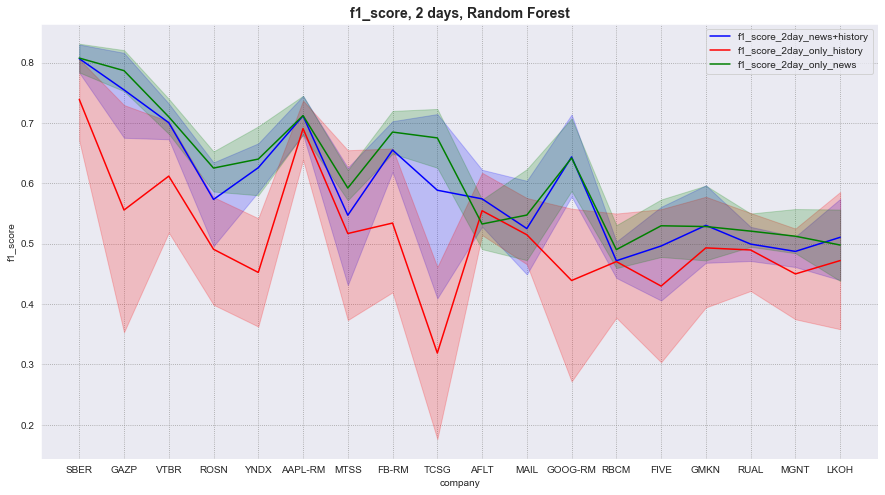

In [115]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('f1_score, 2 days, Random Forest', weight='bold').set_fontsize('14')
metric = tab_1day_with_news[(tab_1day_with_news['period']=='2 days') & (tab_1day_with_news['model']=='Random Forest')].sort_values(by=['has news'], ascending=False)
sns.lineplot(x=metric['company'], y=metric['f1_score'], color='blue', label='f1_score_2day_news+history')
sns.lineplot(x=tab_1day_no_news[(tab_1day_no_news['period']=='2 days') & (tab_1day_no_news['model']=='Random Forest')]['company'],
             y=tab_1day_no_news[(tab_1day_no_news['period']=='2 days') & (tab_1day_no_news['model']=='Random Forest')]['f1_score'], color='red', label='f1_score_2day_only_history')
sns.lineplot(x=tab_1day_only_news[(tab_1day_only_news['period']=='2 days') & (tab_1day_only_news['model']=='Random Forest')]['company'],
             y=tab_1day_only_news[(tab_1day_only_news['period']=='2 days') & (tab_1day_only_news['model']=='Random Forest')]['f1_score'], color='green', label='f1_score_2day_only_news')
plt.show()

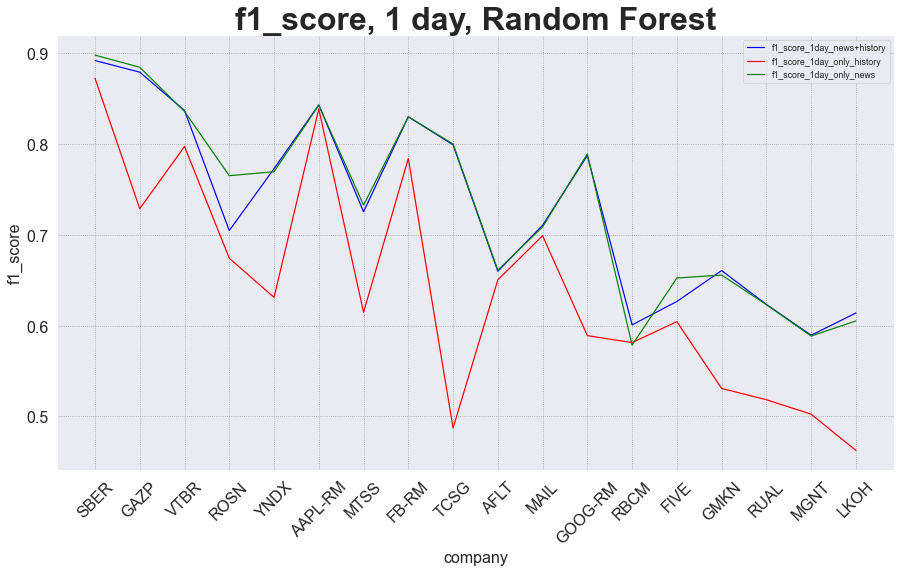

In [199]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('f1_score, 1 day, Random Forest', weight='bold').set_fontsize('32')
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
metric = tab_1day_with_news[(tab_1day_with_news['period']=='1 day') & (tab_1day_with_news['model']=='Random Forest')].sort_values(by=['has news'], ascending=False)
sns.lineplot(x=metric['company'], y=metric['f1_score'], color='blue', label='f1_score_1day_news+history', ci = None)
sns.lineplot(x=tab_1day_no_news[(tab_1day_no_news['period']=='1 day') & (tab_1day_no_news['model']=='Random Forest')]['company'],
             y=tab_1day_no_news[(tab_1day_no_news['period']=='1 day') & (tab_1day_no_news['model']=='Random Forest')]['f1_score'], color='red', label='f1_score_1day_only_history', ci = None)
sns.lineplot(x=tab_1day_only_news[(tab_1day_only_news['period']=='1 day') & (tab_1day_only_news['model']=='Random Forest')]['company'],
             y=tab_1day_only_news[(tab_1day_only_news['period']=='1 day') & (tab_1day_only_news['model']=='Random Forest')]['f1_score'], color='green', label='f1_score_1day_only_news', ci = None)
plt.tick_params(labelsize=16)

plt.xticks(rotation=45)
plt.show()

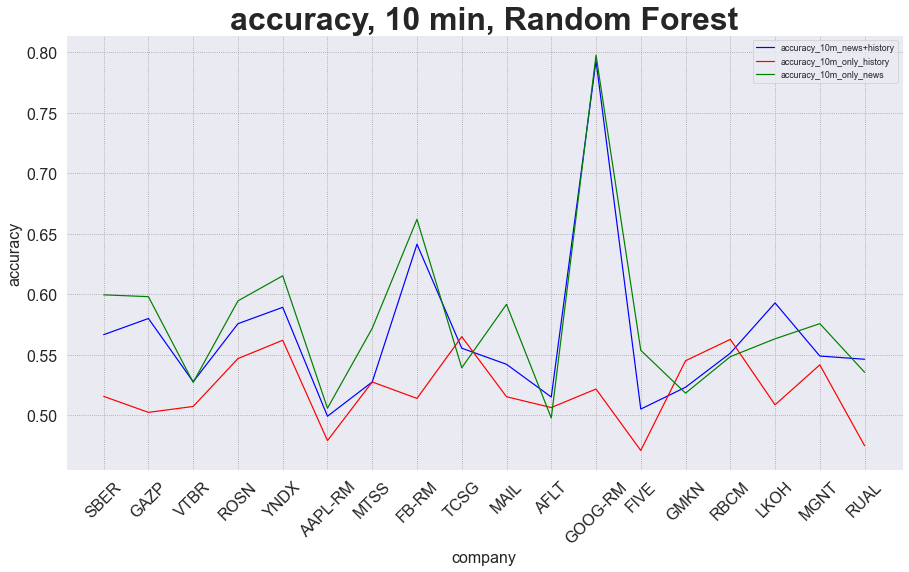

In [198]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('accuracy, 10 min, Random Forest', weight='bold').set_fontsize('32')
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
metric = tab_10min_with_news[(tab_10min_with_news['period']=='10 min') & (tab_10min_with_news['model']=='Random Forest')].sort_values(by=['has news'], ascending=False)
sns.lineplot(x=metric['company'], y=metric['accuracy'], color='blue', label='accuracy_10m_news+history', ci = None)
sns.lineplot(x=tab_10min_no_news[(tab_10min_no_news['period']=='10 min') & (tab_10min_no_news['model']=='Random Forest')]['company'],
             y=tab_10min_no_news[(tab_10min_no_news['period']=='10 min') & (tab_10min_no_news['model']=='Random Forest')]['accuracy'], color='red', label='accuracy_10m_only_history', ci = None)
sns.lineplot(x=tab_10min_only_news[(tab_10min_only_news['period']=='10 min') & (tab_10min_only_news['model']=='Random Forest')]['company'],
             y=tab_10min_only_news[(tab_10min_only_news['period']=='10 min') & (tab_10min_only_news['model']=='Random Forest')]['accuracy'], color='green', label='accuracy_10m_only_news', ci = None)
plt.tick_params(labelsize=16)

plt.xticks(rotation=45)
plt.show()

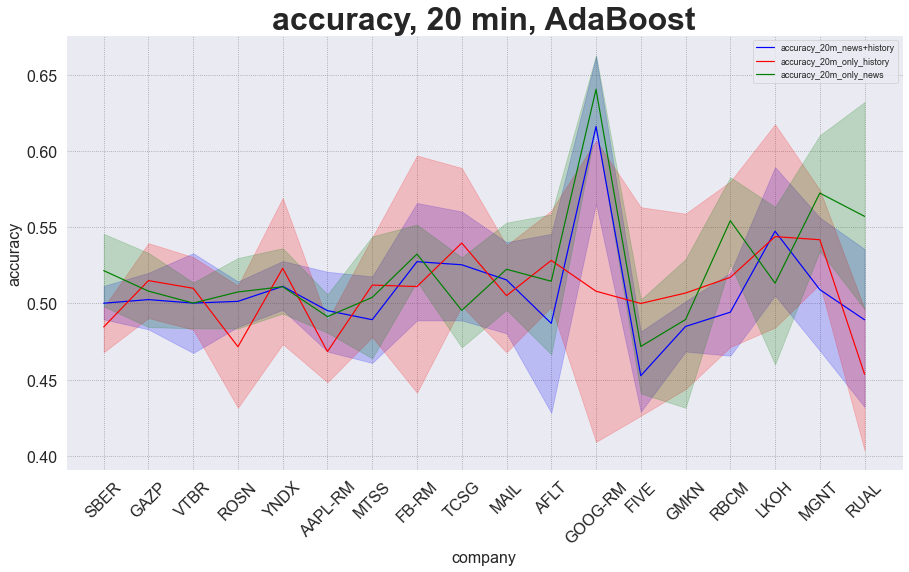

In [122]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('accuracy, 20 min, AdaBoost', weight='bold').set_fontsize('32')
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
metric = tab_10min_with_news[(tab_10min_with_news['period']=='20 min') & (tab_10min_with_news['model']=='AdaBoost')].sort_values(by=['has news'], ascending=False)
sns.lineplot(x=metric['company'], y=metric['accuracy'], color='blue', label='accuracy_20m_news+history')
sns.lineplot(x=tab_10min_no_news[(tab_10min_no_news['period']=='20 min') & (tab_10min_no_news['model']=='AdaBoost')]['company'],
             y=tab_10min_no_news[(tab_10min_no_news['period']=='20 min') & (tab_10min_no_news['model']=='AdaBoost')]['accuracy'], color='red', label='accuracy_20m_only_history')
sns.lineplot(x=tab_10min_only_news[(tab_10min_only_news['period']=='20 min') & (tab_10min_only_news['model']=='AdaBoost')]['company'],
             y=tab_10min_only_news[(tab_10min_only_news['period']=='20 min') & (tab_10min_only_news['model']=='AdaBoost')]['accuracy'], color='green', label='accuracy_20m_only_news')
plt.tick_params(labelsize=16)

plt.xticks(rotation=45)
plt.show()

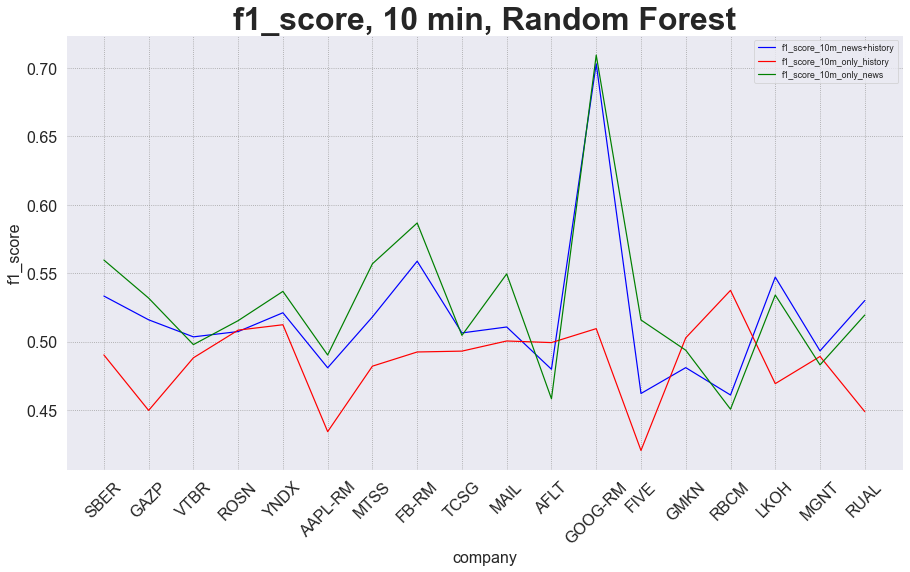

In [196]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('f1_score, 10 min, Random Forest', weight='bold').set_fontsize('32')
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
metric = tab_10min_with_news[(tab_10min_with_news['period']=='10 min') & (tab_10min_with_news['model']=='Random Forest')].sort_values(by=['has news'], ascending=False)
sns.lineplot(x=metric['company'], y=metric['f1_score'], color='blue', label='f1_score_10m_news+history', ci = None)
sns.lineplot(x=tab_10min_no_news[(tab_10min_no_news['period']=='10 min') & (tab_10min_no_news['model']=='Random Forest')]['company'],
             y=tab_10min_no_news[(tab_10min_no_news['period']=='10 min') & (tab_10min_no_news['model']=='Random Forest')]['f1_score'], color='red', label='f1_score_10m_only_history', ci = None
            )
sns.lineplot(x=tab_10min_only_news[(tab_10min_only_news['period']=='10 min') & (tab_10min_only_news['model']=='Random Forest')]['company'],
             y=tab_10min_only_news[(tab_10min_only_news['period']=='10 min') & (tab_10min_only_news['model']=='Random Forest')]['f1_score'], color='green', label='f1_score_10m_only_news', ci = None)
plt.tick_params(labelsize=16)

plt.xticks(rotation=45)
plt.show()

In [85]:
tab_10min_no_news

,Unnamed: 0,company,period,model,Train,Test,f1_score,accuracy,has news
0,0,GOOG-RM,10 min,Logistic Regression,0.875000,0.758621,0.654496,0.758621,537.0
1,1,GOOG-RM,10 min,Ridge,0.875000,0.758621,0.654496,0.758621,537.0
2,2,GOOG-RM,10 min,SVM,0.863636,0.758621,0.654496,0.758621,537.0
3,3,GOOG-RM,10 min,Random Forest,1.000000,0.758621,0.654496,0.758621,537.0
4,4,GOOG-RM,10 min,AdaBoost,1.000000,0.758621,0.654496,0.758621,537.0
...,...,...,...,...,...,...,...,...,...
3235,3235,VTBR,60 min,Ridge,0.514052,0.450128,0.450836,0.450128,2399.0
3236,3236,VTBR,60 min,SVM,0.514563,0.544757,0.384216,0.544757,2399.0
3237,3237,VTBR,60 min,Random Forest,0.995912,0.526854,0.517591,0.526854,2399.0
3238,3238,VTBR,60 min,AdaBoost,0.608074,0.529412,0.497842,0.529412,2399.0


In [129]:
d1 = pd.read_excel('targets.xlsx', sheet_name = '1d')
m10 = pd.read_excel('targets.xlsx', sheet_name = '10m')

In [139]:
d1

,Переменная,Описание переменной,Значение,Количество
0,y_1d,Изменение ср. цены через 1 день,-1,4519
1,y_1d,Изменение ср. цены через 1 день,1,26738
2,y_2d,Изменение ср. цены через 2 дня,-1,7561
3,y_2d,Изменение ср. цены через 2 дня,1,23696


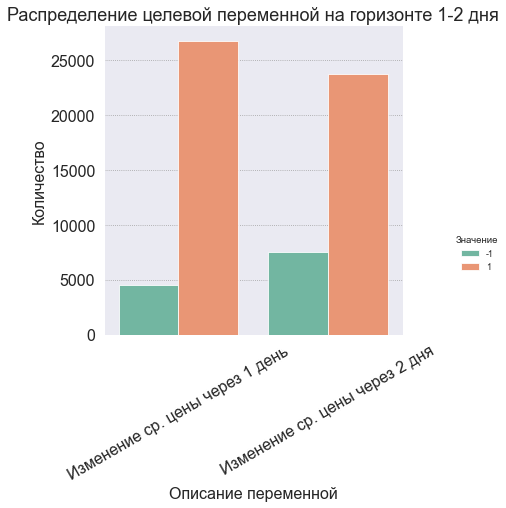

In [187]:

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
g = sns.catplot(x='Описание переменной',
            y='Количество',
            kind='bar', hue = 'Значение',
            data=d1, palette = 'Set2').set(title='Распределение целевой переменной на горизонте 1-2 дня')

plt.tick_params(labelsize=16)

plt.xticks(rotation=30)
plt.show()

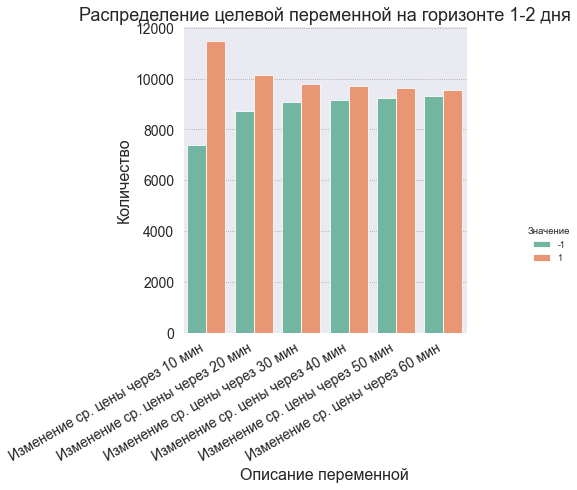

In [190]:

sns.set_context("paper", rc={"font.size":16,"axes.titlesize":18,"axes.labelsize":16})
g = sns.catplot(x='Описание переменной',
            y='Количество',
            kind='bar', hue = 'Значение',
            data=m10, palette = 'Set2').set(title='Распределение целевой переменной на горизонте 1-2 дня')

plt.tick_params(labelsize=14)

plt.xticks(rotation=30, ha="right" )
plt.show()

In [197]:
res

,Unnamed: 0,<TICKER>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,message,date,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,raw_news,lem_message,yes
0,0,GOOG-RM,118516.688312,118516.688312,118516.688312,118516.688312,как сменить профессию в 30 лет и создать успеш...,2020-08-24,118516.688312,0.000000,1.0,0.000000,118516.688312,0.000000,1.0,0.000000,как сменить профессию в 30 лет и создать успеш...,как сменить профессия в 30 год и создать успеш...,1.0
1,1,GOOG-RM,118516.688312,118516.688312,118516.688312,118516.688312,"#телекомы #индексы \n📊 facebook, amazon, apple...",2020-08-24,118516.688312,0.000000,1.0,0.000000,119947.783333,1431.095022,1.0,0.012075,"#телекомы #индексы \n📊 facebook, amazon, apple...",телеком индекс facebook amazon apple microsof...,1.0
2,2,GOOG-RM,118516.688312,118516.688312,118516.688312,118516.688312,топ-10 акций сша на мосбирже по объему сделок ...,2020-08-24,119937.991667,1421.303355,1.0,0.011992,122854.384615,4337.696304,1.0,0.036600,топ-10 акций сша на мосбирже по объему сделок ...,топ 10 акция сша на мосбиржа по объём сделка в...,1.0
4,4,GOOG-RM,122854.384615,122963.461538,122827.276923,122892.738462,​​риски инвестирования в акции. так ли страшен...,2020-08-26,122884.465385,0.000000,1.0,0.000245,124112.392857,1258.008242,1.0,0.010240,​​риски инвестирования в акции. так ли страшен...,риск инвестирование в акция так ли страшный р...,1.0
5,5,GOOG-RM,122854.384615,122963.461538,122827.276923,122892.738462,"суммарная капитализация apple, amazon, microso...",2020-08-26,124103.147321,1218.681937,1.0,0.010165,122094.272727,-760.111888,-1.0,-0.006187,"суммарная капитализация apple, amazon, microso...",суммарный капитализация apple amazon microsoft...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37479,37479,VTBR,0.047973,0.048078,0.047882,0.047980,#инвестидея \n\nдля квалифицированных инвестор...,2021-12-07,0.047978,0.000000,1.0,0.000110,0.047973,0.000000,1.0,0.000000,#инвестидея \n\nдля квалифицированных инвестор...,инвестидея для квалифицировать инвестор us gl...,1.0
37480,37480,VTBR,0.047973,0.048078,0.047882,0.047980,втб самостоятельно подключает части клиентов п...,2021-12-07,0.047978,0.000000,1.0,0.000110,0.047973,0.000000,1.0,0.000000,втб самостоятельно подключает части клиентов п...,втб самостоятельно подключать часть клиент пак...,1.0
37481,37481,VTBR,0.047973,0.048078,0.047882,0.047980,"первый запред втб юрий соловьев рассказал, ком...",2021-12-07,0.047978,0.000000,1.0,0.000110,0.047973,0.000000,1.0,0.000000,"первый запред втб юрий соловьев рассказал, ком...",первый запред втб юрий соловьёв рассказать кто...,1.0
37482,37482,VTBR,0.047973,0.048078,0.047882,0.047980,​​📉 как посчитать справедливую стоимость афк с...,2021-12-07,0.047978,0.000000,1.0,0.000110,0.048013,0.000040,1.0,0.000832,​​📉 как посчитать справедливую стоимость афк с...,как посчитать справедливый стоимость афк сист...,1.0
